In [1]:
# Import Libraries
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import copy
import pandas as pd
from pandas import read_csv
import seaborn as sns
import cv2
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sqlalchemy import create_engine
from sklearn.metrics import confusion_matrix, classification_report
import string
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.decomposition import PCA,TruncatedSVD, IncrementalPCA
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
file_drive = './5g_data/5G-production-dataset/5G-production-dataset/Amazon_Prime/Driving/animated-AdventureTime/B_2019.11.28_07.27.57.csv'#'AI/Advertising Dataset.csv'#

In [3]:
file_static = './5g_data/5G-production-dataset/5G-production-dataset/Amazon_Prime/Static/animated-Ninjago/B_2020.01.06_09.55.13.csv'#'AI/Advertising Dataset.csv'#

In [4]:
print(read_csv(file_drive))

                Timestamp  Longitude   Latitude  Speed Operatorname  CellID  \
0     2019.11.28_07.27.57  -8.388193  51.935608      0            B      12   
1     2019.11.28_07.27.57  -8.388269  51.935542      1            B      12   
2     2019.11.28_07.27.58  -8.388269  51.935542      1            B      12   
3     2019.11.28_07.27.59  -8.388269  51.935542      1            B      12   
4     2019.11.28_07.28.00  -8.388269  51.935542      1            B      12   
...                   ...        ...        ...    ...          ...     ...   
1893  2019.11.28_08.01.59  -8.483033  51.898677     24            B      11   
1894  2019.11.28_08.02.00  -8.483033  51.898677     24            B      11   
1895  2019.11.28_08.02.01  -8.483033  51.898677     24            B      11   
1896  2019.11.28_08.02.02  -8.483033  51.898677     24            B      11   
1897  2019.11.28_08.02.03  -8.483033  51.898677     24            B      11   

     NetworkMode  RSRP  RSRQ   SNR  ... PINGMIN PIN

In [5]:
df = read_csv(file_drive)

In [6]:
df

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ
0,2019.11.28_07.27.57,-8.388193,51.935608,0,B,12,5G,-102,-10,8.0,...,-,-,-,-,C,A81B,9CBA,11016972,-102.0,-1.0
1,2019.11.28_07.27.57,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,-,-,-,C,A81B,9CBA,11016972,-102.0,-1.0
2,2019.11.28_07.27.58,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,-,-,-,C,A81B,9CBA,11016972,-102.0,-1.0
3,2019.11.28_07.27.59,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,-,-,-,C,A81B,9CBA,11016972,-101.0,-3.0
4,2019.11.28_07.28.00,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,-,-,-,C,A81B,9CBA,11016972,-101.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,2019.11.28_08.01.59,-8.483033,51.898677,24,B,11,5G,-90,-11,-1.0,...,-,-,-,-,B,A9AA,9CBA,11119115,-83.0,-3.0
1894,2019.11.28_08.02.00,-8.483033,51.898677,24,B,11,5G,-93,-12,-1.0,...,-,-,-,-,B,A9AA,9CBA,11119115,-84.0,-2.0
1895,2019.11.28_08.02.01,-8.483033,51.898677,24,B,11,5G,-93,-12,-1.0,...,-,-,-,-,B,A9AA,9CBA,11119115,-84.0,-2.0
1896,2019.11.28_08.02.02,-8.483033,51.898677,24,B,11,5G,-90,-14,1.0,...,-,-,-,-,B,A9AA,9CBA,11119115,-83.0,-2.0


In [7]:
print(read_csv(file_static))

                Timestamp  Longitude   Latitude  Speed Operatorname  CellID  \
0     2020.01.06_09.55.14  -8.394744  51.886172      0            B      11   
1     2020.01.06_09.55.15  -8.394744  51.886172      0            B      11   
2     2020.01.06_09.55.16  -8.394744  51.886172      0            B      11   
3     2020.01.06_09.55.17  -8.394744  51.886172      0            B      11   
4     2020.01.06_09.55.18  -8.394744  51.886172      0            B      11   
...                   ...        ...        ...    ...          ...     ...   
3734  2020.01.06_11.01.56  -8.394744  51.886172      0            B      11   
3735  2020.01.06_11.01.57  -8.394744  51.886172      0            B      11   
3736  2020.01.06_11.01.58  -8.394744  51.886172      0            B      11   
3737  2020.01.06_11.01.59  -8.394744  51.886172      0            B      11   
3738  2020.01.06_11.02.00  -8.394744  51.886172      0            B      11   

     NetworkMode  RSRP  RSRQ  SNR  ...  PINGMIN PIN

In [8]:
df2 = read_csv(file_static)

In [9]:
df2

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ
0,2020.01.06_09.55.14,-8.394744,51.886172,0,B,11,5G,-103,-10,2.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-104.0,-14.0
1,2020.01.06_09.55.15,-8.394744,51.886172,0,B,11,5G,-102,-10,2.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-104.0,-8.0
2,2020.01.06_09.55.16,-8.394744,51.886172,0,B,11,5G,-102,-10,2.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-104.0,-8.0
3,2020.01.06_09.55.17,-8.394744,51.886172,0,B,11,5G,-102,-9,-1.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-105.0,-8.0
4,2020.01.06_09.55.18,-8.394744,51.886172,0,B,11,5G,-102,-9,-1.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-105.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,2020.01.06_11.01.56,-8.394744,51.886172,0,B,11,5G,-104,-13,-5.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-,-
3735,2020.01.06_11.01.57,-8.394744,51.886172,0,B,11,5G,-104,-13,-5.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-,-
3736,2020.01.06_11.01.58,-8.394744,51.886172,0,B,11,5G,-104,-16,-3.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-105.0,-16.0
3737,2020.01.06_11.01.59,-8.394744,51.886172,0,B,11,5G,-104,-16,-3.0,...,-,-,-,-,B,A4DF,9CBA,10805003,-105.0,-16.0


In [10]:
data = 0 

In [11]:
data_driver = np.array(df)

In [12]:
data_static = np.array(df2)

In [6]:
data[16728:16733]   # BER, max throughput, SNR, Code_rate, Modulation

array([[ 4.6650e-01,  4.6650e-01,  4.6650e-01,  4.6650e-01],
       [ 2.9728e+05,  2.9728e+05,  2.9728e+05,  2.9728e+05],
       [-1.0000e+01, -1.0000e+01, -1.0000e+01, -1.0000e+01],
       [ 1.1719e-01,  1.1719e-01,  1.1719e-01,  1.1719e-01],
       [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00]])

In [7]:
data_ch = data[:,0]
print(data_ch[16728:16733])

[ 4.6650e-01  2.9728e+05 -1.0000e+01  1.1719e-01  1.0000e+00]


In [8]:
data_ch = np.reshape(data_ch,(-1,16733))
print(data_ch)

[[  9.858     7.1225    9.4676  ... -10.        0.11719   1.     ]
 [  1.6488    0.95614   1.6194  ...  10.        0.11719   1.     ]
 [  8.8256    8.8775    9.0031  ... -10.        0.23438   1.     ]
 ...
 [  1.6605    1.0832    1.6503  ...  18.        0.94727   1.     ]
 [  1.6574    1.0772    1.6479  ...  19.        0.94727   1.     ]
 [  1.4949    1.0295    1.5102  ...  20.        0.94727   1.     ]]


In [9]:
data_ch = data_ch[18:]            # SNR

In [10]:
data_ch[:,16730]

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20., -20., -19., -18.,
       -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20., -20., -19., -18., -17., -16., -15.,
       -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
         8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
        19.,  20., -20., -19., -18., -17., -16., -15., -14., -13., -12.,
       -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,
         0.,   1.,   2.,   3.,   4.,   5.,   6.,   

In [11]:
data_ch.shape # 41 x 9 = SNR x Code_rate

(369, 16733)

In [12]:
data_cr = data_ch[:,16731].copy()
print(data_cr)

[0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719
 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719
 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719
 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719 0.11719
 0.11719 0.11719 0.11719 0.11719 0.11719 0.23438 0.23438 0.23438 0.23438
 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438
 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438
 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438
 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438 0.23438
 0.23438 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086
 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086
 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086
 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086
 0.38086 0.38086 0.38086 0.38086 0.38086 0.38086 0.

In [13]:
data_c = []
for snr in range(41):
    maxtr = 0
    cr = 0
    for i in range(0,data_ch.shape[0],41):
        #for j in range(9):
        if(data_ch[i+snr][16728]<0.1):
            if(maxtr<data_ch[i+snr][16729]):
                
                cr = data_ch[i+snr][16731]
                maxtr = data_ch[i+snr][16729]

        print(i)
    data_c.append(cr)
print(data_c)

0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82
123
164
205
246
287
328
0
41
82


In [14]:
data_new = data_ch.copy()

In [15]:

for i in range(data_new.shape[0]):
    data_new[i][16731] = data_c[int(data_new[i][16730]+20)]

print(data_new)

[[ 81.929    65.706    77.129   ... -20.        0.        1.     ]
 [ 57.025    50.611    54.943   ... -19.        0.        1.     ]
 [ 44.983    40.369    43.475   ... -18.        0.        1.     ]
 ...
 [  1.6605    1.0832    1.6503  ...  18.        0.94727   1.     ]
 [  1.6574    1.0772    1.6479  ...  19.        0.94727   1.     ]
 [  1.4949    1.0295    1.5102  ...  20.        0.94727   1.     ]]


In [16]:
data_new[:,16729] /= 1e6
print(data_new)

[[ 81.929    65.706    77.129   ... -20.        0.        1.     ]
 [ 57.025    50.611    54.943   ... -19.        0.        1.     ]
 [ 44.983    40.369    43.475   ... -18.        0.        1.     ]
 ...
 [  1.6605    1.0832    1.6503  ...  18.        0.94727   1.     ]
 [  1.6574    1.0772    1.6479  ...  19.        0.94727   1.     ]
 [  1.4949    1.0295    1.5102  ...  20.        0.94727   1.     ]]


In [17]:
scaler = MinMaxScaler()
data_feat = data_new
data_rescaled = scaler.fit_transform(data_feat)
pca = IncrementalPCA(n_components=10,batch_size=100)

In [45]:
#test_rescaled = scaler.fit_transform(X_test)

In [18]:
data_feat[:,16729]

array([0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728,
       0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728,
       0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728,
       0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728,
       0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728,
       0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.29728, 0.59424,
       0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424,
       0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424,
       0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424,
       0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424,
       0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.59424,
       0.59424, 0.59424, 0.59424, 0.59424, 0.59424, 0.96288, 0.96288,
       0.96288, 0.96288, 0.96288, 0.96288, 0.96288, 0.96288, 0.96288,
       0.96288, 0.96288, 0.96288, 0.96288, 0.96288, 0.96288, 0.96288,
       0.96288, 0.96

In [ ]:
svd = TruncatedSVD(n_components=50, n_iter=20, random_state=42)

In [ ]:
svd.fit(data_rescaled)

In [ ]:
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

In [47]:
pca = IncrementalPCA(n_components=15,batch_size=100)

In [48]:
pca.fit(data_rescaled)

IncrementalPCA(batch_size=100, copy=True, n_components=15, whiten=False)

In [49]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print(pca.singular_values_)

[9.92504066e-01 1.17778328e-03 9.80622942e-04 7.89355524e-04
 6.64665047e-04 5.99407844e-04 5.69621232e-04 4.76213300e-04
 4.34785481e-04 4.31517379e-04 1.98559154e-04 1.48224952e-04
 1.30294851e-04 1.20908677e-04 9.55421662e-05]
0.9993215677460666
[477.78610138  16.45887157  15.0182175   13.47422178  12.36427869
  11.741635    11.44617679  10.46569623  10.0001124    9.96245816
   6.75790872   5.83885948   5.47433023   5.27346538   4.68775501]


In [112]:
data_trans = pca.transform(data_rescaled)

In [115]:
test_trans = pca.transform(test_rescaled)

In [116]:
data_trans.shape

(10000, 100)

In [19]:
X_train = data_rescaled[:,:16731]
print(X_train.shape)

(369, 16731)


In [20]:
y_train = data_rescaled[:,16731:]
print(y_train.shape)

(369, 2)


In [52]:
pca = IncrementalPCA(n_components=1)

In [53]:
pca.fit(y_train)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_incremental_pca.py:297: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio = S ** 2 / np.sum(col_var * n_total_samples)


IncrementalPCA(batch_size=None, copy=True, n_components=1, whiten=False)

In [54]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print(pca.singular_values_)

[1.]
1.0000000000000004
[8.17097746]


In [91]:
y_train = pca.transform(y_train)
print(y_train)

[[-0.53463923]
 [-0.53463923]
 [-0.39346007]
 [-0.39346007]
 [-0.21699515]
 [-0.21699515]
 [-0.09934384]
 [-0.09934384]
 [ 0.03006538]
 [ 0.03006538]
 [ 0.17124454]
 [ 0.17124454]
 [ 0.23005815]
 [ 0.23005815]
 [ 0.34770946]
 [ 0.34770946]
 [ 0.46536077]
 [ 0.46536077]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.53463923]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346007]
 [-0.39346

In [92]:
y_train = np.round(10*y_train)
print(y_train)

[[-5.]
 [-5.]
 [-4.]
 [-4.]
 [-2.]
 [-2.]
 [-1.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 3.]
 [ 5.]
 [ 5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-5.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-4.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-2.]
 [-1.]
 [-1.]

In [93]:
y_train = y_train+5
print(y_train)

[[ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 3.]
 [ 3.]
 [ 4.]
 [ 4.]
 [ 5.]
 [ 5.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 7.]
 [ 8.]
 [ 8.]
 [10.]
 [10.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 3.]
 [ 4.]
 [ 4.]

In [102]:
y_train.shape

(387, 1)

In [65]:
lda = LinearDiscriminantAnalysis(n_components=11)
yval = y_train[:,1]
lda.fit(X_train, yval)
print(X_train)
print(lda)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(16731, 1 - 1) = 0 components.
  ChangedBehaviorWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[[0.76604407 0.75319512 0.7289348  ... 0.99860488 0.         0.        ]
 [0.529687   0.57813193 0.51568518 ... 0.99575397 0.         0.025     ]
 [0.41539965 0.45935107 0.40545591 ... 0.99593595 0.         0.05      ]
 ...
 [0.00423761 0.00373681 0.00344106 ... 0.10492539 1.         0.95      ]
 [0.00420819 0.00366722 0.00341799 ... 0.10493954 1.         0.975     ]
 [0.00266595 0.00311403 0.00209443 ... 0.05540256 1.         1.        ]]
LinearDiscriminantAnalysis(n_components=11, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:399: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


In [64]:
trainX_lda = lda.transform(X_train)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#3E655E","#5E666E","#6E676E","#7E685E","#9E695E"]
print(trainX_lda)
plt.figure(figsize=(10, 10))
plt.xlim(trainX_lda[:, 0].min(), trainX_lda[:, 0].max())
plt.ylim(trainX_lda[:, 1].min(), trainX_lda[:, 1].max())
print(trainX_lda.shape)
for i in range(len(trainX_lda)):
    # actually plot the digits as text instead of using scatter
    plt.text(trainX_lda[i, 0], trainX_lda[i, 1], str(y_train[i,0]),
             color=colors[int(y_train[i,0])], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show(block=True)

[]


IndexError: index 0 is out of bounds for axis 1 with size 0

<Figure size 720x720 with 0 Axes>

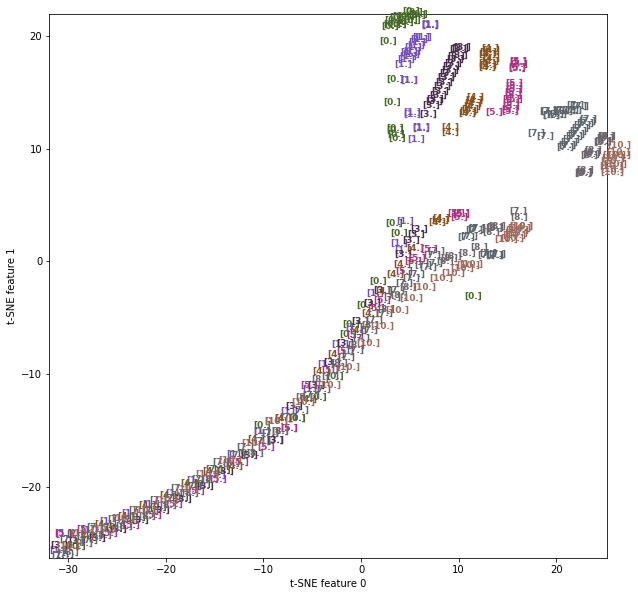

In [114]:
tsne = TSNE(random_state=21)
# use fit_transform instead of fit, as TSNE has no transform method
trainX_tsne = tsne.fit_transform(X_train)
plt.figure(figsize=(10, 10))
plt.xlim(trainX_tsne[:, 0].min(), trainX_tsne[:, 0].max())
plt.ylim(trainX_tsne[:, 1].min(), trainX_tsne[:, 1].max())
for i in range(len(trainX_tsne)):
    # actually plot the digits as text instead of using scatter
    plt.text(trainX_tsne[i, 0], trainX_tsne[i, 1], str(y_train[i]),
            color=colors[int(y_train[i])], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show(block=True)

In [115]:
trainX_tsne.shape

(387, 2)

In [98]:
testX_tsne.shape

(1000, 2)

In [39]:
X_train = np.concatenate((X_train,trainX_tsne),axis=1)

In [43]:
X_test = np.concatenate((X_test,testX_tsne),axis=1)

In [ ]:
l = np.unique(data_new[:,7])
print(l.shape)

In [ ]:
corr_data = pd.DataFrame({data_fn})

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
print(data_fn[0])
print(data_new[0][335:365])

In [ ]:
data_new.shape

In [21]:
yval = y_train[:,0]
print(yval.shape)

(369,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(np.float64(X_train), yval, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(295, 16731)

In [24]:
y_test.shape

(74,)

In [69]:
xgb_model = xgb.XGBClassifier()#(xgb_model='best_grid.pkl')#xgb.train(loaded_params,xgb_model=)#

parameters = {'nthread':[3], #when use hyperthread, xgboost may become slower
              'objective':['multi:softmax'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [15],
              'min_child_weight': [15],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [1.0],
              'n_estimators': [100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = RandomizedSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=20, 
                   scoring='accuracy',
                   verbose=2, refit=True)
X_tr = X_train
X_ts = X_test

clf.fit(X_tr, y_train)

y_pred = clf.predict(X_ts)

print(confusion_matrix(y_test, y_pred))

#xgb_model.fit(X_train, y_train)
'''
param_grid = {  }

gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )



'''
#clf.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric='logloss',verbose=True)

#evals_result = clf.evals_result()

Fitting 20 folds for each of 1 candidates, totalling 20 fits


/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:   11.7s finished


XGBoostError: value 0 for Parameter num_class should be greater equal to 1

In [50]:
(y_pred==y_test).sum()/len(y_test)

0.527

In [ ]:
y_pred.shape

In [ ]:
from sklearn.externals import joblib

In [ ]:

joblib.dump(clf.best_estimator_, 'part_grid.pkl')
clf.save_model('best_model.model')

In [ ]:
loaded_params = joblib.load('best_grid.pkl')

In [ ]:
y_pred2 = loaded_params.predict(X_test)

In [ ]:
(y_pred2==y_pred).shape

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dvalid = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:

#params=loaded_params,
params = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['multi:softmax'],
              'learning_rate': [0.05], #so called `eta` value
              #'max_depth': [6],
              #'min_child_weight': [11],
              #'silent': [1],
              #'subsample': [0.8],
              #'colsample_bytree': [0.7],
              'n_estimators': [10] #number of trees, change it to 1000 for better results
              #'missing':[-999],
              'seed': [1337]
             }

mod = xgb.train(params= params,dtrain=dtrain,num_boost_round=10000,early_stopping_rounds=100,evals=[(dvalid,'valid'), (dtrain,'train')])

In [ ]:
for l in range(10):
    data_new = []
    data_fn = []
    for k in range(10000):
        b = data[10000*l+k][1]
        for i in b.splitlines():
            m = 0
            a = []
            c = []
            for j in i.split('\t'):
                #print(m)
                if(m!=1 and m!=2):
                    a.append(float(j))
                else:
                    c.append(str(j))
                m += 1
        #print(a)
        a = np.array(a)
        c = np.array(c)
        #print(type(a[0][6]))
        #print(a)
        data_fn.append(c)
        data_new.append(a)
        
    data_fn = np.array(data_fn)
    data_new = np.array(data_new)
    
    X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=0.1, random_state=42)
    xg_train_1 = xgb.DMatrix(X_train, label=y_train)
    xg_test = xgb.DMatrix(X_test, label=y_test)
    
    params = {'objective': 'multi:softmax', 'verbose': False, 'num_class' : 5, 'num_parallel_tree' : 10}

    if i==0:
        model_1 = xgb.train(params, xg_train_1, 30)
        model_1.save_model('model_1.model')
    else:
        model_2_v2 = xgb.train(params, xg_train_2, 30, xgb_model='model_1.model')
        model_2_v2.save_model('model_1.model')
        print(np.sum(model_2_v2.predict(xg_test)== y_test)/len(y_test))

In [ ]:
xg_train_1 = xgb.DMatrix(X_train, label=y_train)
xg_train_2 = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {'objective': 'multi:softmax', 'verbose': False, 'num_class' : 5, 'n_estimators' : 1}

model_1 = xgb.train(params, xg_train_1, 5)

In [ ]:
model_1.save_model('model_1.model')

In [ ]:
model_2_v1 = xgb.train(params, xg_train_2, 10)
model_2_v2 = xgb.train(params, xg_train_2, 10, xgb_model='model_1.model')

In [ ]:
print(np.sum(model_1.predict(xg_test)== y_test))     # benchmark
print(np.sum(model_2_v1.predict(xg_test)== y_test))  # "before"
print(np.sum(model_2_v2.predict(xg_test)== y_test))

In [ ]:
xgb_scikit = xgb.XGBClassifier(verbose=0,
                               objective='multi:softmax',
                               n_jobs=4)

In [ ]:
xgb_scikit.fit(X_train,y_train)

In [ ]:
xgb.train(params=xgb_scikit.get_xgb_params, dtrain=dtrain, xgb_model=xgb_scikit)

In [ ]:
reg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
print(reg.score(X_train, y_train))

In [ ]:
print(reg.coef_)
print(reg.intercept_)

In [ ]:
test_pred = reg.predict(X_test)
print(test_pred)
print(y_test)

In [ ]:
test_loss = np.sum(np.square(y_test-test_pred))
test_loss = test_loss/250
print(test_loss)

In [238]:
print(x_train.shape)

(897, 9)


In [25]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_labeltest = np.array(y_test)
y_label = np.array(y_train)

In [26]:
batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset = x_train,
                                          batch_size = batch_size,
                                          shuffle = False)

test_loader = torch.utils.data.DataLoader(dataset = x_test,
                                          batch_size = 1,
                                          shuffle = False)

In [27]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.lin1 = nn.Linear(9,200)
        self.lin2 = nn.Linear(200,1000)
        self.lin3 = nn.Linear(1000,5000)
        self.lin4 = nn.Linear(5000,500)
        self.lin5 = nn.Linear(500,100)
        self.lin6 = nn.Linear(100,15)
        self.act1 = nn.ReLU()
        self.act2 = nn.Sigmoid()
        #self.act3 = nn.Tanh()
        #self.sof = nn.Softmax()
        
    def forward(self,x):
        #batch, data = x
        
        out = self.lin1(x)
        out = self.act1(out)
        out = self.lin2(out)
        out = self.act1(out)
        out = self.lin3(out)
        out = self.act1(out)
        out = self.lin4(out)
        out = self.act1(out)
        #out = out + out2
        out = self.lin5(out)
        out = self.act1(out)
        out = self.lin6(out)
        out = self.act2(out)
        '''
        out = self.lin1(x)
        out = self.act1(out)
        out = self.lin2(out)
        out = self.act1(out)
        out = self.lin5(out)
        out = self.act1(out)
        out = self.lin6(out)
        out = self.act2(out)
        '''
        return out

In [28]:
device = torch.device('cuda')
model = (LogisticRegressionModel().double()).to(device)

In [29]:
criterion = nn.functional.cross_entropy
#criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [31]:
def train(train_loader):
    model.train()
    optimizer.zero_grad()
    loss_all = 0
    i = 0
    for data in train_loader:
        '''
        inputs = data.to(device)
        optimizer.zero_grad()
        output = model(inputs)
        #print(output.shape)
        label = torch.LongTensor(y_label[i*100:(i+1)*100]).to(device)
        #print(label.shape)
        
        #out_prob = nn.functional.softmax(output,dim=1)
        #print(out_prob.shape)
        #max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        #pred = torch.reshape(pred, (-1, 1))
        loss = criterion(output, label)
        #print(output)
        loss.backward()
        optimizer.step()
        
        '''
        inputs = data.to('cuda')
        #print(type(inputs))
        #print(inputs)
        labels = torch.LongTensor(np.array(y_label[i*50:(i+1)*50]-1)).to('cuda')
        #print(labels)
        i = i+1
        
    
        outputs = model(inputs)
        #print(outputs)
        #print(outputs)
        loss = criterion(outputs,labels)
    
        loss.backward()
    
        optimizer.step()
        loss_all += loss
        
    return loss_all

In [34]:
def evaluate(train_loader):
    model.eval()

    predictions = []
    labels = []

    with torch.no_grad():
        for data in train_loader:
            data = data.to(device)
            pred = model(data)
            
            pred = pred.detach().cpu().numpy()
            #ed2 = ed2.detach().cpu().numpy()
            label = data.y.detach().cpu().numpy()
            pred = np.mean(pred,0)
            predictions.append(pred)
            labels.append(label)

    predictions = np.hstack(predictions)
    
    #print("labels")
    labels = np.hstack(labels)
    #print(labels)
    #predictions = np.reshape(predictions,labels.shape)
    #print(predictions)
    return mse(labels, predictions)

In [33]:
#del model, optimizer, loss, outputs
torch.cuda.empty_cache()
CUDA_LAUNCH_BLOCKING=1

In [34]:
optimizer.zero_grad()
model.train()
model.load_state_dict(torch.load('/home/shubham/log_5g.pkl'))
for epoch in range(5000):
    epoch += 1
    
    i = 0
    loss = train(train_loader)
    if epoch%200==0:
        print('epoch {}, loss {}'.format(epoch, loss.data))
        torch.save(model.state_dict(),'/home/shubham/log_5g.pkl')
    '''
    for data in train_loader:
        inputs = data.to('cuda')
        #print(type(inputs))
        #print(inputs)
        labels = torch.LongTensor(np.array(y_label[i*100:(i+1)*100]-1)).to('cuda')
        #print(labels)
        i = i+1
        
    
        outputs = model(inputs)
        #print(outputs)
        #print(outputs)
        loss = criterion(outputs,labels)
    
        loss.backward()
    
        optimizer.step()
        # Logging
        
        if epoch%200==0:
            print('epoch {}, loss {}'.format(epoch, loss.data))
        if loss<1:
            pass
            torch.save(model.state_dict(),'/home/shubham/lin_5g.pkl')
    
    '''

epoch 200, loss 42.056750207309236
epoch 400, loss 41.585268040712954
epoch 600, loss 40.69909879644
epoch 800, loss 40.6164968236418
epoch 1000, loss 40.43198604411577
epoch 1200, loss 39.482983538838646
epoch 1400, loss 40.05738268225399
epoch 1600, loss 39.52473511382506
epoch 1800, loss 39.07717954163045
epoch 2000, loss 39.072278966039576
epoch 2200, loss 39.36476827373336
epoch 2400, loss 39.07671592027564
epoch 2600, loss 38.093028145389724
epoch 2800, loss 37.796836837856304
epoch 3000, loss 38.772631639342485
epoch 3200, loss 37.58194538674524
epoch 3400, loss 37.560683564563696
epoch 3600, loss 37.43872630951116
epoch 3800, loss 37.295873138806805
epoch 4000, loss 37.48838026958493
epoch 4200, loss 37.26633309004693
epoch 4400, loss 38.040684580249305
epoch 4600, loss 36.96948280856105
epoch 4800, loss 37.378055981868286
epoch 5000, loss 37.382807192594484


In [35]:
labels = []
for data in test_loader:
    l = model(data.to(device))
    out_prob = nn.functional.softmax(l,dim=1)
    #print(out_prob.shape)
    max_prob, pred = torch.max(out_prob,dim=1)
    #print(pred.shape)
    labels.append((pred.cpu()).numpy())

In [36]:
labels = np.array(labels)

In [37]:
l = np.unique(y_label)

In [38]:
print(labels)
print(l)

[[ 7]
 [ 7]
 [14]
 [14]
 [13]
 [ 2]
 [10]
 [12]
 [13]
 [ 7]
 [13]
 [13]
 [14]
 [ 6]
 [10]
 [ 5]
 [14]
 [13]
 [13]
 [14]
 [10]
 [ 8]
 [ 7]
 [14]
 [13]
 [ 9]
 [ 6]
 [13]
 [11]
 [12]
 [ 5]
 [12]
 [11]
 [10]
 [11]
 [ 9]
 [11]
 [10]
 [ 7]
 [ 8]
 [11]
 [ 9]
 [ 9]
 [13]
 [13]
 [13]
 [13]
 [11]
 [11]
 [ 9]
 [11]
 [ 6]
 [13]
 [13]
 [14]
 [14]
 [14]
 [11]
 [14]
 [11]
 [13]
 [ 9]
 [13]
 [ 6]
 [14]
 [ 9]
 [ 9]
 [11]
 [ 8]
 [ 4]
 [ 6]
 [13]
 [ 7]
 [14]
 [11]
 [ 9]
 [11]
 [10]
 [13]
 [14]
 [14]
 [ 8]
 [11]
 [10]
 [11]
 [13]
 [11]
 [ 7]
 [ 8]
 [ 5]
 [14]
 [ 9]
 [ 9]
 [ 7]
 [13]
 [ 4]
 [14]
 [11]
 [11]
 [11]
 [14]
 [14]
 [ 7]
 [14]
 [ 6]
 [13]
 [11]
 [11]
 [ 9]
 [ 6]
 [13]
 [13]
 [14]
 [13]
 [13]
 [10]
 [ 7]
 [11]
 [12]
 [11]
 [ 7]
 [13]
 [ 6]
 [ 5]
 [11]
 [12]
 [11]
 [13]
 [11]
 [11]
 [ 9]
 [ 8]
 [ 5]
 [13]
 [14]
 [ 8]
 [ 9]
 [ 6]
 [11]
 [ 6]
 [11]
 [ 8]
 [11]
 [ 9]
 [ 6]
 [11]
 [ 9]
 [11]
 [14]
 [11]
 [11]
 [11]
 [10]
 [ 4]
 [14]
 [ 6]
 [13]
 [13]
 [13]
 [14]
 [ 9]
 [ 7]
 [11]
 [13]
 [13]
 [14]
 [13

In [39]:
acc = (y_labeltest==labels[:][0])

In [40]:
accuracy = acc.sum()/len(acc)
print(accuracy)

0.02666666666666667


In [ ]:
pca = IncrementalPCA(n_components=100,batch_size=1000)
batch_size = 100

for x in df:
    print(x)
    data_new = []
    data_fn = []
    data = np.array(x)
    for k in range(10000):
        b = data[k][1]
        for i in b.splitlines():
            m = 0
            a = []
            c = []
            for j in i.split('\t'):
                #print(m)
                if(m!=1 and m!=2):
                    a.append(np.float32(j))
                else:
                    c.append(str(j))
                m += 1
        #print(a)
        a = np.array(a,dtype=np.float32)
        c = np.array(c)
        #print(type(a[0][6]))
        #print(a)
        data_fn.append(c)
        data_new.append(a)
        
    data_fn = np.array(data_fn)
    data_new = np.array(data_new,dtype=np.float32)
    
    X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=0.1, random_state=42)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    pca.fit(X_train)
    data_train = pca.transform(X_train)
    data_test = pca.transform(X_test)
    data_train = np.asarray(data_train,np.float32)
    data_test = np.asarray(data_test,np.float32)
    
    train_loader = torch.utils.data.DataLoader(dataset = data_train,
                                              batch_size = batch_size,
                                              shuffle = False)

    test_loader = torch.utils.data.DataLoader(dataset = data_test,
                                              batch_size = 1,
                                              shuffle = False)
    
    torch.cuda.empty_cache()
    
    
    
    for epoch in range(30):
        loss = train(train_loader)

        #val_acc = evaluate(val_loader)    
        #test_acc = evaluate(test_loader)


        if epoch%1==0:
            #learning_rate *= 0.9
            #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            print('Epoch: {:03d}, Loss: {:.5f}'.
              format(epoch, loss))
            torch.save(model.state_dict(),'m_pca_dl.pkl')
        
    labels = []
    for data_t in test_loader:
        l = model(data_t.to(device))
        out_prob = nn.functional.softmax(l,dim=1)
        #print(out_prob.shape)
        max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        labels.append((pred.cpu()).numpy())
    
    labels = np.array(labels)
    acc = (y_test==labels[:][0])
    accuracy = acc.sum()/len(acc)
    print(accuracy)
    
        

        index                                                  0
0           1  0\te791ac64-71be-11ea-bd9b-a3cc40581063\tf0931...
1           2  1\td82bb79f-71be-11ea-bd9b-3b9845418535\t92019...
2           3  0\td4d7ab5a-71be-11ea-bd9b-9165b2d9ddb1\tfba32...
3           4  1\tc7759c19-71be-11ea-bd9b-e73978b2c4cd\t57b07...
4           5  0\te282343f-71be-11ea-bd9b-dbf702df66ed\t935a9...
...       ...                                                ...
99995   99996  1\tcd7541ad-71be-11ea-bd9b-8500f8c9f638\t25180...
99996   99997  0\tdfc0f140-71be-11ea-bd9b-45e74fc616b3\t924d1...
99997   99998  1\te9762456-71be-11ea-bd9b-bf2346f28ea7\t8d251...
99998   99999  0\tec537a35-71be-11ea-bd9b-3735fead3324\t948ea...
99999  100000  1\te7422d44-71be-11ea-bd9b-719de7d8e7d3\t41d52...

[100000 rows x 2 columns]
Epoch: 000, Loss: 120.41720
Epoch: 001, Loss: 120.41618
Epoch: 002, Loss: 120.41619
Epoch: 003, Loss: 120.41605
Epoch: 004, Loss: 120.41404
Epoch: 005, Loss: 119.96582
Epoch: 006, Loss: 119.796

In [173]:
labels = []
for data_t in test_loader:
        l = model(data_t.to(device))
        out_prob = nn.functional.softmax(l,dim=1)
        #print(out_prob.shape)
        max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        labels.append((pred.cpu()).numpy())

In [175]:
l = np.unique(labels)
print(l)

[1 2]


In [18]:
pca = IncrementalPCA(n_components=100,batch_size=1000)
batch_size = 1000
loop_i = 0

#model.load_state_dict(torch.load('m_pca_dl.pkl'))
#model.eval()

for x in df:
    print(x)
    data_new = []
    data_fn = []
    data = np.array(x)
    for k in range(len(data)):
        b = data[k][1]
        for i in b.splitlines():
            m = 0
            a = []
            c = []
            for j in i.split('\t'):
                #print(m)
                if(m!=1 and m!=2):
                    a.append(np.float32(j))
                else:
                    c.append(str(j))
                m += 1
        #print(a)
        a = np.array(a,dtype=np.float32)
        c = np.array(c)
        #print(type(a[0][6]))
        #print(a)
        data_fn.append(c)
        data_new.append(a)
        
    data_fn = np.array(data_fn)
    data_new = np.array(data_new,dtype=np.float32)
    
    X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=0.1, random_state=42)
    
    
    '''
    laskmd
    '''
    xg_train_1 = xgb.DMatrix(X_train, label=y_train)
    xg_test = xgb.DMatrix(X_test, label=y_test)
    
    params = {'objective': 'multi:softmax', 'verbose': False, 'num_class' : 5, 'num_parallel_tree' : 15, 'learning_rate': 0.05, #so called `eta` value
              'max_depth': 15,
              'min_child_weight': 15,
              'silent': 1,
              'subsample': 0.7,
              'colsample_bytree': 1.0,
              'n_estimators': 15,
               'nthread' : 3}

    if loop_i==0:
        model_2_v2 = xgb.train(params, xg_train_1, 10, xgb_model='model_1.model')
        model_2_v2.save_model('xgb_dl.model')
        labels_test = model_2_v2.predict(xg_test)
        labels_train = model_2_v2.predict(xg_train_1)
        print(np.sum(labels_test == y_test)/len(y_test))
        print(loop_i)
    else:
        model_2_v2 = xgb.train(params, xg_train_1, 10, xgb_model='xgb_dl.model')
        model_2_v2.save_model('xgb_dl.model')
        labels_test = model_2_v2.predict(xg_test)
        labels_train = model_2_v2.predict(xg_train_1)
        print(np.sum(labels_test == y_test)/len(y_test))
        print(loop_i)
        
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    pca.fit(X_train)
    data_train = pca.transform(X_train)
    data_test = pca.transform(X_test)
    data_train = np.asarray(data_train,np.float32)
    data_test = np.asarray(data_test,np.float32)
    
    labels_test = np.reshape((100*labels_test),(-1,1))
    labels_train = np.reshape((100*labels_train),(-1,1))
    print(labels_train)
    X_train_new = np.concatenate((data_train,labels_train),axis=1)
    X_test_new = np.concatenate((data_test,labels_test),axis=1)
    
    
    train_loader = torch.utils.data.DataLoader(dataset = X_train_new,
                                              batch_size = batch_size,
                                              shuffle = False)

    test_loader = torch.utils.data.DataLoader(dataset = X_test_new,
                                              batch_size = 1,
                                              shuffle = False)
    
    
    torch.cuda.empty_cache()
    
    
    
    for epoch in range(20):
        loss = train(train_loader)

        #val_acc = evaluate(val_loader)    
        #test_acc = evaluate(test_loader)


        if epoch%1==0:
            #learning_rate *= 0.9
            #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            print('Epoch: {:03d}, Loss: {:.5f}'.
              format(epoch, loss))
            torch.save(model.state_dict(),'m_xgb_dl.pkl')
        
    
    
    
    labels_train = []
    labels_test = []
    for data_t in test_loader:
        l_test = model(data_t.to(device))
        out_prob = nn.functional.softmax(l_test,dim=1)
        #print(out_prob.shape)
        max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        labels_test.append((pred.cpu()).numpy())
        
#     for data_tr in train_loader:
#         l_train = model(data_tr.to(device))
#         out_prob = nn.functional.softmax(l_train,dim=1)
#         #print(out_prob.shape)
#         max_prob, pred = torch.max(out_prob,dim=1)
#         #print(pred.shape)
#         labels_train.append((pred.cpu()).numpy())
    
    labels_test = np.array(labels_test)
    #labels_train = np.array(labels_train)
    acc = (y_test==labels_test[:][0])
    accuracy = acc.sum()/len(acc)
    print(accuracy)
    
    '''
    XGBoost Implementation on Increased feature space
    '''
        
    if loop_i%5==1:
        model_2_v2.save_model('xgb_dl_5.model')
    
    loop_i +=1
    

        index                                                  0
0     4450001  0\tec9453fc-71be-11ea-bd9b-77a3ec3bc16e\t6656b...
1     4450002  1\tee333741-71be-11ea-bd9b-9175cbb93d31\tf850a...
2     4450003  2\tda11b64d-71be-11ea-bd9b-17c929c6afd4\t779ec...
3     4450004  1\tc885fb3f-71be-11ea-bd9b-b72732336108\tfb8a1...
4     4450005  1\tdef6c312-71be-11ea-bd9b-dfc3e02c7ef0\tabb7f...
...       ...                                                ...
9995  4459996  0\te9203b3f-71be-11ea-bd9b-5360d26ca68a\t4cdc1...
9996  4459997  2\tcd206a9f-71be-11ea-bd9b-79bfbad4f32c\t4b198...
9997  4459998  2\tdf3bbbab-71be-11ea-bd9b-991edd2db6cc\t74561...
9998  4459999  2\tdd95858c-71be-11ea-bd9b-c7e88b642e92\t3879a...
9999  4460000  1\te02b4b8d-71be-11ea-bd9b-05a4de643fd8\t69614...

[10000 rows x 2 columns]
0.544
0
[[100.]
 [100.]
 [  0.]
 ...
 [100.]
 [100.]
 [  0.]]
Epoch: 000, Loss: 12.26409
Epoch: 001, Loss: 12.26408
Epoch: 002, Loss: 12.26407
Epoch: 003, Loss: 12.26406
Epoch: 004, Loss: 12.264

Epoch: 010, Loss: 12.24820
Epoch: 011, Loss: 12.24819
Epoch: 012, Loss: 12.24817
Epoch: 013, Loss: 12.24816
Epoch: 014, Loss: 12.24815
Epoch: 015, Loss: 12.24813
Epoch: 016, Loss: 12.24812
Epoch: 017, Loss: 12.24811
Epoch: 018, Loss: 12.24809
Epoch: 019, Loss: 12.24808
0.422
        index                                                  0
0     5410001  2\td4c2ea84-71be-11ea-bd9b-619e28e694a8\t34983...
1     5410002  1\tc4a2cd7f-71be-11ea-bd9b-eb95d8835d07\td4c68...
2     5410003  1\te9820ab8-71be-11ea-bd9b-01429f926c9c\td8633...
3     5410004  1\td4ac54d9-71be-11ea-bd9b-f501a7d52e5e\tec15b...
4     5410005  2\td3289b2d-71be-11ea-bd9b-630e66e7536f\t23726...
...       ...                                                ...
9995  5419996  1\tdc9490a3-71be-11ea-bd9b-2bb4ce56eb3c\ta59c7...
9996  5419997  0\tc52fcb12-71be-11ea-bd9b-1b48ec74ddc8\t704a6...
9997  5419998  2\tdbc83f30-71be-11ea-bd9b-b990479363c7\t31e22...
9998  5419999  1\te35e3bec-71be-11ea-bd9b-3908c0cd87db\tc0f56...
9999  542

KeyboardInterrupt: 

In [28]:
pca = IncrementalPCA(n_components=100,batch_size=1000)
batch_size = 100
loop_i = 0

model.load_state_dict(torch.load('m_xgb_dl.pkl'))
model.eval()

for x in df:
    print(x)
    data_new = []
    data_fn = []
    data = np.array(x)
    for k in range(len(data)):
        b = data[k][1]
        for i in b.splitlines():
            m = 0
            a = []
            c = []
            for j in i.split('\t'):
                #print(m)
                if(m!=1 and m!=2):
                    a.append(np.float32(j))
                else:
                    c.append(str(j))
                m += 1
        #print(a)
        a = np.array(a,dtype=np.float32)
        c = np.array(c)
        #print(type(a[0][6]))
        #print(a)
        data_fn.append(c)
        data_new.append(a)
        
    data_fn = np.array(data_fn)
    data_new = np.array(data_new,dtype=np.float32)
    
    #X_train, X_test, y_train, y_test = train_test_split(data_new[:,1:], data_new[:,0], test_size=1.0, random_state=42)
    X_test = data_new[:,1:]
    y_test = data_new[:,0]
    
    '''
    laskmd
    '''
    #xg_train_1 = xgb.DMatrix(X_train, label=y_train)
    xg_test = xgb.DMatrix(X_test, label=y_test)
    
    params = {'objective': 'multi:softmax', 'verbose': False, 'num_class' : 5, 'num_parallel_tree' : 15, 'learning_rate': 0.05, #so called `eta` value
              'max_depth': 15,
              'min_child_weight': 15,
              'silent': 1,
              'subsample': 0.7,
              'colsample_bytree': 1.0,
              'n_estimators': 15,
               'nthread' : 3}
    
    '''
    if loop_i==0:
        model_2_v2 = xgb.train(params, xg_train_1, 10, xgb_model='model_1.model')
        model_2_v2.save_model('xgb_dl.model')
        labels_test = model_2_v2.predict(xg_test)
        labels_train = model_2_v2.predict(xg_train_1)
        print(np.sum(labels_test == y_test)/len(y_test))
        print(loop_i)
    else:
        model_2_v2 = xgb.train(params, xg_train_1, 10, xgb_model='xgb_dl.model')
        model_2_v2.save_model('xgb_dl.model')
        labels_test = model_2_v2.predict(xg_test)
        labels_train = model_2_v2.predict(xg_train_1)
        print(np.sum(labels_test == y_test)/len(y_test))
        print(loop_i)
        
    '''
    bst = xgb.Booster({'nthread': 3})
    bst.load_model('xgb_dl.model')
    labels_test = bst.predict(xg_test)
    
    scaler = MinMaxScaler()
    #X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    pca.fit(X_test)
    #data_train = pca.transform(X_train)
    data_test = pca.transform(X_test)
    #data_train = np.asarray(data_train,np.float32)
    data_test = np.asarray(data_test,np.float32)
    
    labels_test2 = np.reshape((100*labels_test),(-1,1))
    #labels_train = np.reshape((100*labels_train),(-1,1))
    #print(labels_train)
    #X_train_new = np.concatenate((data_train,labels_train),axis=1)
    X_test_new = np.concatenate((data_test,labels_test2),axis=1)
    
    
    #train_loader = torch.utils.data.DataLoader(dataset = X_train_new,
     #                                         batch_size = batch_size,
     #                                         shuffle = False)

    test_loader = torch.utils.data.DataLoader(dataset = X_test_new,
                                              batch_size = 1000,
                                              shuffle = False)
    
    
    torch.cuda.empty_cache()
    
    
    '''
    for epoch in range(20):
        loss = train(train_loader)

        #val_acc = evaluate(val_loader)    
        #test_acc = evaluate(test_loader)


        if epoch%1==0:
            #learning_rate *= 0.9
            #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
            print('Epoch: {:03d}, Loss: {:.5f}'.
              format(epoch, loss))
            torch.save(model.state_dict(),'m_xgb_dl.pkl')
        
    '''
    
    
    labels_train = []
    label_test = []
    label_final = []
    sloop = 0
    for data_t in test_loader:
        l_test = model(data_t.to('cuda'))
        out_prob = nn.functional.softmax(l_test,dim=1)
        #print(out_prob.shape)
        max_prob, pred = torch.max(out_prob,dim=1)
        #print(pred.shape)
        lab_val = (pred.cpu()).numpy()
        label_test.append(lab_val)
        
        #print(lab_test)
        #print(lab_test)
    
    label_test = np.reshape(label_test,(-1,1))
    labels_test = np.reshape(labels_test,(-1,1))
    lab_test = np.concatenate((labels_test,label_test),axis=1)
    print(lab_test)
    
    for z in range(len(lab_test)):
        label_final.append(np.random.choice(lab_test[z], 1, p=[0.5,0.5])[0])
        #print(label_final)
        
#     for data_tr in train_loader:
#         l_train = model(data_tr.to(device))
#         out_prob = nn.functional.softmax(l_train,dim=1)
#         #print(out_prob.shape)
#         max_prob, pred = torch.max(out_prob,dim=1)
#         #print(pred.shape)
#         labels_train.append((pred.cpu()).numpy())
    
    
    label_final = np.array(label_final)
    #labels_train = np.array(labels_train)

    
    print(label_final)
    acc = (y_test==label_final[:][0])
    accuracy = acc.sum()/len(acc)
    print(accuracy)
    
    '''
    XGBoost Implementation on Increased feature space
    '''
        
    #if loop_i%5==1:
    #    model_2_v2.save_model('xgb_dl_5.model')
    
    loop_i +=1
    

       index                                                  0
0     910001  1\tf09394ff-71be-11ea-bd9b-b54447a684cd\t758ee...
1     910002  2\td14e3680-71be-11ea-bd9b-1f6bc8584e88\t5ee2e...
2     910003  1\ted3a30a1-71be-11ea-bd9b-2be82ae2c928\t78269...
3     910004  1\te21149f8-71be-11ea-bd9b-bfd7854a282a\t36b04...
4     910005  2\teba16822-71be-11ea-bd9b-fd4eb9bf2656\tc51b8...
...      ...                                                ...
9995  919996  2\tcb5b148c-71be-11ea-bd9b-1d1526707f11\te2062...
9996  919997  1\tbd9c666f-71be-11ea-bd9b-2170d0052670\t0479e...
9997  919998  1\te19a446f-71be-11ea-bd9b-6f1c8ea1c4d1\t66437...
9998  919999  1\td5b1b6b3-71be-11ea-bd9b-4562d52b522d\teac7d...
9999  920000  0\tda476bcb-71be-11ea-bd9b-e5ac74d0e5fc\t957e9...

[10000 rows x 2 columns]


/home/shubham/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[1. 1. 0. ... 0. 1. 0.]
0.4543
       index                                                  0
0     920001  3\tcf445ca8-71be-11ea-bd9b-91fd9213d01f\t0c732...
1     920002  2\td0a32934-71be-11ea-bd9b-558ae84e35d0\t7f542...
2     920003  0\td0cbbf62-71be-11ea-bd9b-d5685ec8ae76\t2906c...
3     920004  2\tdcc6c354-71be-11ea-bd9b-17657e833bb8\t1f11c...
4     920005  1\tbf5820f5-71be-11ea-bd9b-4de4d3eb1f89\t019a8...
...      ...                                                ...
9995  929996  2\tbd8ed234-71be-11ea-bd9b-7b37e813cb05\t030ee...
9996  929997  0\td663a20a-71be-11ea-bd9b-451f2190ccf1\tf0983...
9997  929998  2\te6611b6d-71be-11ea-bd9b-c1ab61507b3a\t78350...
9998  929999  1\tbca97aed-71be-11ea-bd9b-2f4f64755c25\t9943b...
9999  930000  2\te75d5621-71be-11ea-bd9b-d1476f207792\tca561...

[10000 rows x 2 columns]


/home/shubham/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [2. 0.]
 [2. 0.]
 [1. 0.]]
[1. 1. 0. ... 0. 2. 0.]
0.4506
       index                                                  0
0     930001  0\tdb37984b-71be-11ea-bd9b-19f754862e05\t98118...
1     930002  0\tcf89c968-71be-11ea-bd9b-91899970c247\t19420...
2     930003  4\tcd18f085-71be-11ea-bd9b-b77f895b4518\t3676d...
3     930004  1\tddd41549-71be-11ea-bd9b-9d7e823fb3d6\t75f57...
4     930005  0\teb8c32b5-71be-11ea-bd9b-c1f7d75a6354\t450fc...
...      ...                                                ...
9995  939996  0\td7ec1672-71be-11ea-bd9b-790614041d40\t8dfb3...
9996  939997  2\te3ba8caf-71be-11ea-bd9b-cfc110566642\t9410e...
9997  939998  2\tee62d2b4-71be-11ea-bd9b-49456c82debd\t98eb1...
9998  939999  1\te795078a-71be-11ea-bd9b-95fc4d0ddac0\t91fd8...
9999  940000  1\te99655e8-71be-11ea-bd9b-dba695895435\t4c1ff...

[10000 rows x 2 columns]


/home/shubham/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [4. 0.]
 [2. 0.]
 [0. 1.]]
[0. 0. 1. ... 4. 0. 1.]
0.2634
       index                                                  0
0     940001  1\td2bc4468-71be-11ea-bd9b-077377b180c9\t5d9f1...
1     940002  1\td590e928-71be-11ea-bd9b-7362c78e61d6\t9b346...
2     940003  1\tbf98abac-71be-11ea-bd9b-d142cd8a15bb\t24fc8...
3     940004  4\tef2a67eb-71be-11ea-bd9b-a38a2c8a2683\t36faf...
4     940005  1\te14b8897-71be-11ea-bd9b-f934f5e7f019\t5c1f6...
...      ...                                                ...
9995  949996  0\tdfeeb853-71be-11ea-bd9b-cf9536548003\t5c792...
9996  949997  1\te11adb99-71be-11ea-bd9b-35840327f776\t6827d...
9997  949998  4\te55b1d27-71be-11ea-bd9b-ab6c611e8d53\t35cc8...
9998  949999  2\tc50140f8-71be-11ea-bd9b-af02dc12528b\t5833e...
9999  950000  0\td1b582d1-71be-11ea-bd9b-19d000de99c5\t02023...

[10000 rows x 2 columns]


/home/shubham/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


KeyboardInterrupt: 

In [10]:
df.columns

Index(['Timestamp', 'Longitude', 'Latitude', 'Speed', 'Operatorname', 'CellID',
       'NetworkMode', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate',
       'UL_bitrate', 'State', 'PINGAVG', 'PINGMIN', 'PINGMAX', 'PINGSTDEV',
       'PINGLOSS', 'CELLHEX', 'NODEHEX', 'LACHEX', 'RAWCELLID', 'NRxRSRP',
       'NRxRSRQ'],
      dtype='object')

In [11]:
def clean_data(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        #x_old = x
        #x = x.replace('-', '0')
        try:
            x = np.float64(x)
        except:    
            x = np.nan
    return(x)

In [12]:
df_d = df.copy()

In [13]:
df_d.drop(['PINGAVG','PINGMIN','PINGMAX','PINGSTDEV','PINGLOSS','State','NODEHEX','LACHEX','RAWCELLID'
          ,'Timestamp','Longitude','Latitude','Operatorname','CellID','CELLHEX','NetworkMode'],axis=1,inplace=True)
#df_d = df_d[df_d.SNR.apply(lambda x: (x).isnumeric())].set_index('SNR')
#df_d = df_d.replace(to_replace= ' -', value= np.nan, regex=True)
#x = df_d[df_d.SNR.str.isnumeric()]
#df_d['SNR'] = df_d['SNR'].apply(clean_data).astype('float')
for cols in df_d.columns:
    df_d[cols] = df_d[cols].apply(clean_data).astype('float')
df_d.dropna(inplace=True)
df_d.reset_index(inplace=True)
df_d.drop(['index'],axis=1,inplace=True)
df_d

,Speed,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ
0,1.0,-99.0,-10.0,7.0,14.0,-80.0,278.0,6.0,-99.0,-2.0
1,1.0,-99.0,-10.0,10.0,14.0,-80.0,0.0,0.0,-97.0,0.0
2,1.0,-99.0,-10.0,10.0,13.0,-82.0,279.0,8.0,-97.0,0.0
3,1.0,-99.0,-13.0,10.0,13.0,-82.0,0.0,6.0,-99.0,-2.0
4,1.0,-99.0,-13.0,10.0,13.0,-82.0,1048.0,9.0,-99.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
1117,24.0,-90.0,-11.0,-1.0,14.0,-66.0,4698.0,300.0,-83.0,-3.0
1118,24.0,-93.0,-12.0,-1.0,14.0,-66.0,0.0,0.0,-84.0,-2.0
1119,24.0,-93.0,-12.0,-1.0,14.0,-66.0,7.0,64.0,-84.0,-2.0
1120,24.0,-90.0,-14.0,1.0,14.0,-66.0,0.0,0.0,-83.0,-2.0


In [14]:
print(type(df_d['SNR'][0]))

<class 'numpy.float64'>


In [15]:
df_d['SNR']

0        7.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
1117    -1.0
1118    -1.0
1119    -1.0
1120     1.0
1121     1.0
Name: SNR, Length: 1122, dtype: float64

In [16]:
df

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ
0,2019.11.28_07.27.57,-8.388193,51.935608,0,B,12,5G,-102,-10,8.0,...,-,-,-,-,C,A81B,9CBA,11016972,-102.0,-1.0
1,2019.11.28_07.27.57,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,-,-,-,C,A81B,9CBA,11016972,-102.0,-1.0
2,2019.11.28_07.27.58,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,-,-,-,C,A81B,9CBA,11016972,-102.0,-1.0
3,2019.11.28_07.27.59,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,-,-,-,C,A81B,9CBA,11016972,-101.0,-3.0
4,2019.11.28_07.28.00,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,-,-,-,C,A81B,9CBA,11016972,-101.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,2019.11.28_08.01.59,-8.483033,51.898677,24,B,11,5G,-90,-11,-1.0,...,-,-,-,-,B,A9AA,9CBA,11119115,-83.0,-3.0
1894,2019.11.28_08.02.00,-8.483033,51.898677,24,B,11,5G,-93,-12,-1.0,...,-,-,-,-,B,A9AA,9CBA,11119115,-84.0,-2.0
1895,2019.11.28_08.02.01,-8.483033,51.898677,24,B,11,5G,-93,-12,-1.0,...,-,-,-,-,B,A9AA,9CBA,11119115,-84.0,-2.0
1896,2019.11.28_08.02.02,-8.483033,51.898677,24,B,11,5G,-90,-14,1.0,...,-,-,-,-,B,A9AA,9CBA,11119115,-83.0,-2.0


In [17]:
X_train = df_d.drop(['CQI'],axis=1)
y_train = df_d['CQI']

In [18]:
X_train

,Speed,RSRP,RSRQ,SNR,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ
0,1.0,-99.0,-10.0,7.0,-80.0,278.0,6.0,-99.0,-2.0
1,1.0,-99.0,-10.0,10.0,-80.0,0.0,0.0,-97.0,0.0
2,1.0,-99.0,-10.0,10.0,-82.0,279.0,8.0,-97.0,0.0
3,1.0,-99.0,-13.0,10.0,-82.0,0.0,6.0,-99.0,-2.0
4,1.0,-99.0,-13.0,10.0,-82.0,1048.0,9.0,-99.0,-2.0
...,...,...,...,...,...,...,...,...,...
1117,24.0,-90.0,-11.0,-1.0,-66.0,4698.0,300.0,-83.0,-3.0
1118,24.0,-93.0,-12.0,-1.0,-66.0,0.0,0.0,-84.0,-2.0
1119,24.0,-93.0,-12.0,-1.0,-66.0,7.0,64.0,-84.0,-2.0
1120,24.0,-90.0,-14.0,1.0,-66.0,0.0,0.0,-83.0,-2.0


In [32]:
print(X_train.shape)

(897, 9)


In [20]:
y_train

0       14.0
1       14.0
2       13.0
3       13.0
4       13.0
        ... 
1117    14.0
1118    14.0
1119    14.0
1120    14.0
1121    14.0
Name: CQI, Length: 1122, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [22]:
lasso_reg = Lasso(alpha=5)
lasso_reg.fit(X_train,y_train)
pred = lasso_reg.predict(X_test)

In [23]:
mse = np.sqrt(np.square(np.subtract(y_test,pred)).mean())

In [24]:
mse

2.822092054388608

In [222]:
coeff = lasso_reg.coef_

In [223]:
coeff

array([-0.00000000e+00,  3.17580866e-02,  0.00000000e+00,  1.11934043e-01,
        3.38608607e-03,  2.61523025e-05, -1.69285468e-04,  0.00000000e+00,
       -9.82316920e-05])